In [59]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import scikitplot as skplt
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier

In [93]:
d = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_train_data_rpkm.csv',index_col=0)
d_info = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_train_info_2.csv',index_col=0)
d2 = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/X_test_data_rpkm.csv',index_col=0)
d2_info = pd.read_csv('/data/users/gb/Asan/survival/nanostring/Rawdata/tr-te-split/Y_test_info_2.csv',index_col=0)
d3 = pd.read_csv('/data/users/gb/Asan/survival/nanostring/coef/elastic_coef_RELAPSE_02_gene.txt',index_col=0)

In [94]:
features = ['CCL5','CCL7','TNFSF13B','CSF2RB','CLEC4E','CCL8','SELE','EDNRB','IL17B','IL2RA','FCER1A','TGFBI','GZMB'] #RELAPSE
features2 = d3.index
features, features2

(['CCL5',
  'CCL7',
  'TNFSF13B',
  'CSF2RB',
  'CLEC4E',
  'CCL8',
  'SELE',
  'EDNRB',
  'IL17B',
  'IL2RA',
  'FCER1A',
  'TGFBI',
  'GZMB'],
 Index(['KIT', 'IKBKB', 'MAPK1', 'IL17B', 'NOTCH2', 'C8G', 'CTNNB1', 'IL1RN',
        'TAL1', 'CCL26', 'PSMB5', 'EDNRB', 'CISH', 'IRF3', 'NFKB1', 'IL19',
        'EBI3', 'HLA.DQA1', 'CSF2', 'IL1R2', 'ITLN1', 'KLRC3', 'TNFRSF9',
        'TNFSF11', 'IL26', 'DPP4', 'IL6', 'PDCD2', 'PTPN2', 'KIR3DL2', 'PTGER4',
        'TNFSF13B', 'FCGR2A', 'sCTLA4', 'UBE2L3', 'IL27', 'GBP1', 'ITGA5',
        'ARG2', 'JAK2', 'ATM', 'HLA.DMA', 'LTB4R', 'S100A9', 'NOD2', 'TGFB1',
        'TAGAP', 'S1PR1', 'KLRG2', 'CXCL12', 'KCNJ2', 'TNFSF15', 'FCGR1A.B',
        'LILRA4', 'RUNX1', 'LTB4R2', 'IL22', 'TFRC', 'C5', 'CEACAM6', 'MIF',
        'IL18R1', 'CRADD', 'FCGRT', 'ITGB1', 'SIGIRR', 'PRKCD', 'PPBP', 'ATG7',
        'IL3', 'CSF1', 'CD82', 'ABCB1', 'LILRA3', 'NCAM1', 'TNF', 'HLA.DRB3',
        'MBP', 'JAK1', 'IL22RA2', 'IL2RA', 'TRAF1', 'FOXP3', 'ITGAM', 'RARRES3',


In [95]:
d_info_2 = d_info['RELAPSE']
d2_info_2 = d2_info['RELAPSE']

In [97]:
# oversampling
X, Y = SMOTE(random_state=1000).fit_sample(d,d_info_2)
X2, Y2 = SMOTE(random_state=1000,k_neighbors=3).fit_sample(d2,d2_info_2)

In [98]:
X_over = pd.DataFrame(X,columns = d.columns)
X_over2 = pd.DataFrame(X2,columns=d.columns)

In [99]:
#ol = d_info['pCR']
Y_over = pd.DataFrame(Y)
Y_over.columns = ['RELAPSE']
#ol2 = d_info['pCR']
Y_over2 = pd.DataFrame(Y2)
Y_over2.columns = ['RELAPSE']

In [100]:
X_test = X_over2
Y_test = Y_over2

In [102]:
len(X_over)

44

In [71]:
clf = RandomForestClassifier()

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 10000, num = 15)]
#n_estimators=[1410,1620,1120,4860]
#n_estimators=[300]
# Number of features to consider at every split
#max_features = ['log2']
max_features = ['sqrt','log2',None]
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(1, 10, num = 5)]
max_depth = [1,3,5,10]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,7,10]#,6,7,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,5,10]#,6,7,8]
#min_samples_leaf = range(5,10,1)
# Method of selecting samples for training each tree
bootstrap = [True, False]
max_leaf_nodes = [10,20,30]
criterion = ["gini", "entropy"]

In [73]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,                                                                          
               'max_features' : max_features,               
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : criterion
               
               
              }
print(random_grid)

{'n_estimators': [1000, 1642, 2285, 2928, 3571, 4214, 4857, 5500, 6142, 6785, 7428, 8071, 8714, 9357, 10000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [1, 3, 5, 10], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [1, 3, 5, 10], 'criterion': ['gini', 'entropy']}


In [81]:
CV_random=GridSearchCV(estimator=clf,param_grid=random_grid,cv=10,n_jobs=-1)#,scoring='roc_auc')

In [82]:
CV_random2=GridSearchCV(estimator=clf,param_grid=random_grid,cv=10,n_jobs=-1)#,scoring='roc_auc')

In [84]:
CV_random.fit(X_over[features],Y_over)

/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 10],
          

In [85]:
CV_random2.fit(X_over[features2],Y_over)

/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/data/users/gb/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=F...
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 10],
          

In [86]:
L = CV_random.best_estimator_
O=L.predict(X_test[features])

In [87]:
L2 = CV_random2.best_estimator_
O2=L2.predict(X_test[features2])

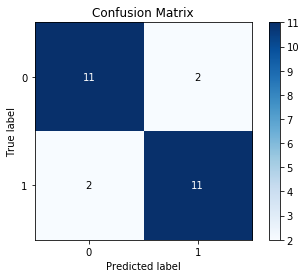

In [88]:
#skplt.metrics.plot_confusion_matrix(Y_test,O)
skplt.metrics.plot_confusion_matrix(Y_test,O)
plt.show()

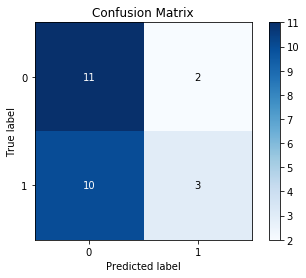

In [92]:
#skplt.metrics.plot_confusion_matrix(Y_test,O)
skplt.metrics.plot_confusion_matrix(Y_test,O2)
plt.show()

In [89]:
pr = L.predict_proba(X_test[features])[:,1]
fpr,tpr,threshold = metrics.roc_curve(Y_test,pr)
roc_auc = metrics.auc(fpr,tpr)

In [90]:
pr2 = L2.predict_proba(X_test[features2])[:,1]
fpr2,tpr2,threshold = metrics.roc_curve(Y_test,pr2)
roc_auc2 = metrics.auc(fpr2,tpr2)

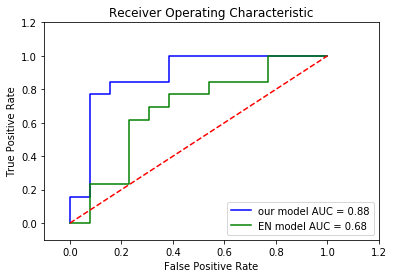

In [91]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='our model AUC = %0.2f'% roc_auc)
plt.plot(fpr2, tpr2, 'g',
label='EN model AUC = %0.2f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
precision, recall, thresholds = precision_recall_curve(Y_test,pr)
AP=metrics.average_precision_score(Y_test,pr)

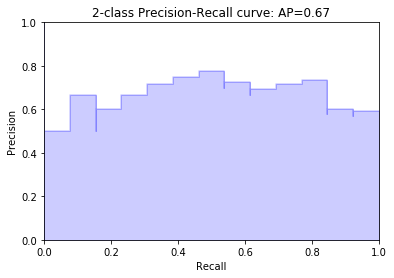

In [23]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
#plt.plot(recall/(recall+precision),'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          AP))
plt.show()

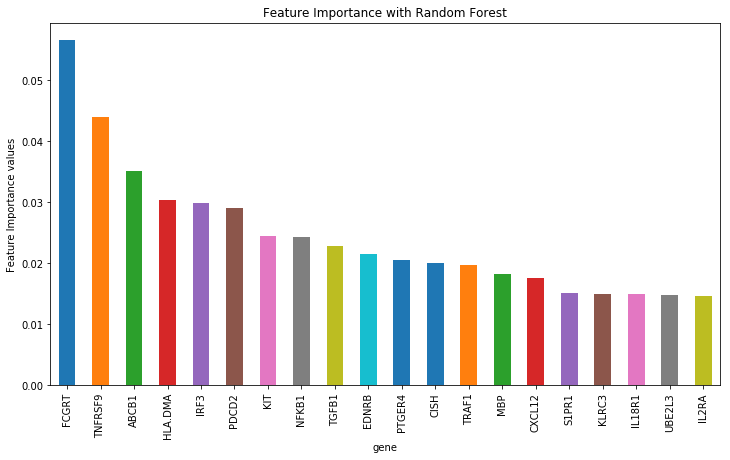

In [24]:
imp_feat_rf = pd.Series(L.feature_importances_, index=features).sort_values(ascending=False)
imp_feat_rf[:20].plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
#plt.savefig('FeatImportance.png')
plt.show()

## 무작위 추출 후 진행

In [25]:
f = open('/data/users/gb/Asan/survival/random_selection-feature/nano_random_feature_selection_results_RELAPSE_1000_smote_split_EN.txt','w')

In [26]:
for i in range(1000) :  # RELAPSE 경우
    o = []    
    features = np.random.choice(d2.columns,13,replace = False) 
    #CV_random.fit(X_over[features],Y_over)    
    L = CV_random.best_estimator_
    L.fit(X_train[features],Y_train)
    O = L.predict(X_test[features])    
    cm = metrics.confusion_matrix(Y_test,O)
    pr = L.predict_proba(X_test[features])[:,1] 
    fpr,tpr,threshold = metrics.roc_curve(Y_test,pr)    
    roc_auc = metrics.auc(fpr,tpr)    
    precision, recall, thresholds = precision_recall_curve(Y_test,pr)    
    AP = metrics.average_precision_score(Y_test,pr) 
    
    #o.append(["feature =",features,"AUC =",str(roc_auc),'AP =',str(AP), 'PPV =', str(cm[1,1]/(cm[1,0]+cm[1,1])) ]) # pCR    
    o.append(["feature =",features,"AUC =",str(roc_auc),'AP =',str(AP), 'PPV =', str(cm[0,0]/(cm[0,0]+cm[0,1])) ]) # relaspe
    f.write(str(o) + '\n')

NameError: name 'X_train' is not defined

In [ ]:
f.close()

In [25]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [26]:
dotfile = six.StringIO()
i_tree = 0
col = features

In [29]:
for tree_in_forest in L.estimators_:
    export_graphviz(tree_in_forest,out_file='/data/users/gb/Asan/survival/tree_plot/RELAPSE/nano_RELAPSE_tree.dot',
                    feature_names=col,
                    filled=True,
                    rounded=True)
    
    (graph,) = pydot.graph_from_dot_file('/data/users/gb/Asan/survival/tree_plot/RELAPSE/nano_RELAPSE_tree.dot')
    
    name = '/data/users/gb/Asan/survival/tree_plot/RELAPSE/nano_RELAPSE_tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1